# 0 Loading packages <a name="loading"></a> 

In [1]:
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

/home2/s418610/.conda/envs/py37_res_PAGA/bin/python
['/home2/s418610/jupyter_notebooks/03.Invivo_neuronal_reprogramming/Manuscript/to_GitHub', '', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/cm/shared/apps/python/2.7.x-anaconda/lib', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python37.zip', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/lib-dynload', '/home2/s418610/.local/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/fa2-0.3.5-py3.7-linux-x86_64.egg', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/IPython/extensions', '/home2/s418610/.ipython']
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [2]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold
import statsmodels.api as sm

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

import scanpy as sc
import harmonypy as hm

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('sklearn', sklearn.__version__)
print('statsmodels', sm.__version__)
print('matplotlib', mpl.__version__)
print('seaborn', sns.__version__)

sc.logging.print_versions()

!date +%F

numpy 1.17.2
pandas 0.25.2
scipy 1.3.1
sklearn 0.21.3
statsmodels 0.10.1
matplotlib 3.0.3
seaborn 0.9.0
scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
2020-08-24


In [4]:
import anndata
import pickle

In [5]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [6]:
from scipy.stats import chi2_contingency

In [7]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [8]:
import os

# set a working directory for saving plots
wdir = "/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2"
# wdir = "/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures/Figure2/"
os.chdir( wdir )

In [15]:
# A sub-directory for saving intermediate data for organized pipeline v1
data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/'

In [16]:
neural_data_dir = data_dir + 'NeuralOnly/'

In [9]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [10]:
from scipy.stats import chi2_contingency

In [11]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

# 1 Load data

### Gene cluster data

In [12]:
gene_data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/Gene_clusters/'

In [13]:
input_path = gene_data_dir + 'adata_genes_Manuscript_v2'
with open(input_path, 'rb') as input_file:
 
    adata_genes = pickle.load(input_file)

In [14]:
adata_genes

AnnData object with n_obs × n_vars = 2469 × 4601 
    obs: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'p_val_adj', 'n_counts', 'n_cells_experimental', 'louvain', 'log10_n_cells_experimental'
    var: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime', 'Rpl32', 'Egfr'
    uns: 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [25]:
# How many genes are in each cluster? 
louvain_clusters_counter = adata_genes.obs['louvain'].value_counts()
louvain_clusters_counter

0     582
1     313
2     309
3     302
4     240
5     218
6     135
7     131
8      91
9      76
10     56
11     16
Name: louvain, dtype: int64

In [17]:
adata_neural = sc.read(neural_data_dir + 'POv2_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_ann_rankPseudotime.h5ad')

In [36]:
# Calculate geometric mean (in form of log1p-transformed read counts) for each cluster of genes
i = 3
n_cluster_gene = str(i)
cluster_gene_index = adata_genes.obs[adata_genes.obs['louvain'] == n_cluster_gene].index
#    adata_neural_tmp.obs['louvain_cluster_'+n_cluster_gene+'_gene_log_mean'] = adata_neural_tmp.raw[:, cluster_gene_index.tolist()].X.sum(axis=1)/louvain_clusters_counter[i]
#     adata_neural_tmp.obs['louvain_cluster_'+n_cluster_gene+'_gene_scaled_mean'] = adata_neural_tmp[:, cluster_gene_index.tolist()].X.sum(axis=1)/louvain_clusters_counter[i]

In [40]:
metab_genes = pd.DataFrame(cluster_gene_index.tolist())

# 2 Calculate cluster mean for each gene cluster

In [18]:
adata_neural_tmp = adata_neural.copy()

In [29]:
# Calculate geometric mean (in form of log1p-transformed read counts) for each cluster of genes
for i in range(len(louvain_clusters_counter)):
    n_cluster_gene = str(i)
    cluster_gene_index = adata_genes.obs[adata_genes.obs['louvain'] == n_cluster_gene].index
    adata_neural_tmp.obs['louvain_cluster_'+n_cluster_gene+'_gene_log_mean'] = adata_neural_tmp.raw[:, cluster_gene_index.tolist()].X.sum(axis=1)/louvain_clusters_counter[i]
#     adata_neural_tmp.obs['louvain_cluster_'+n_cluster_gene+'_gene_scaled_mean'] = adata_neural_tmp[:, cluster_gene_index.tolist()].X.sum(axis=1)/louvain_clusters_counter[i]

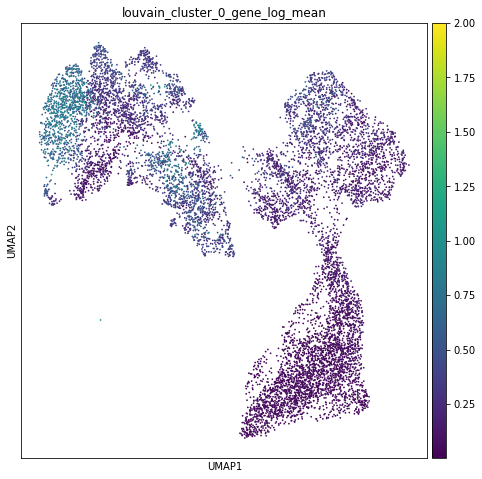

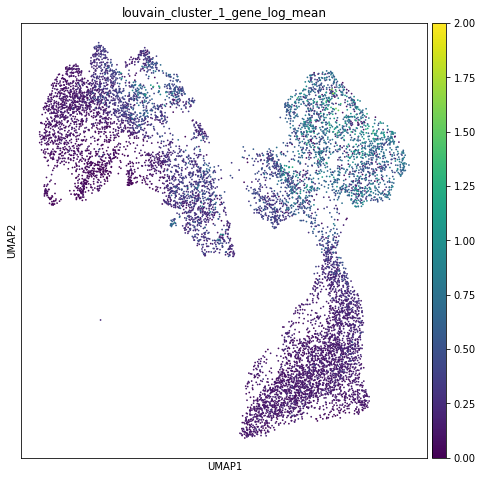

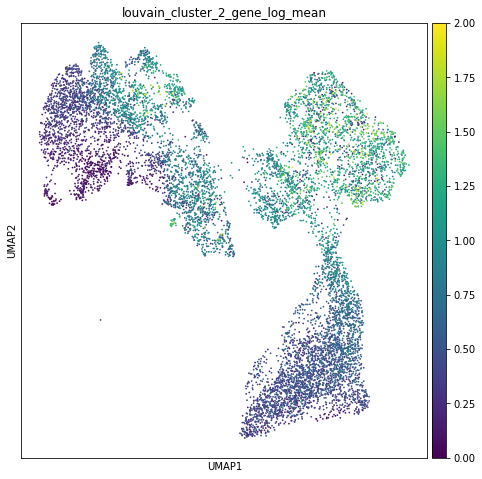

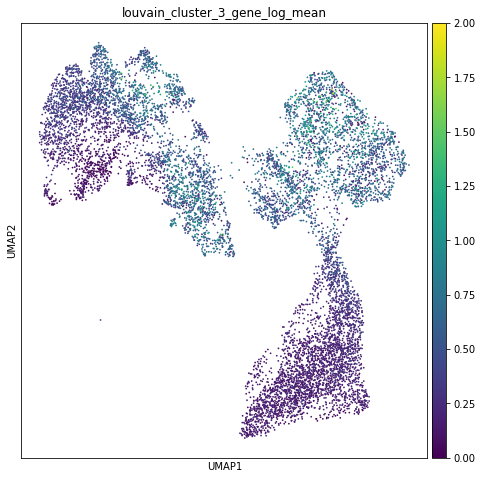

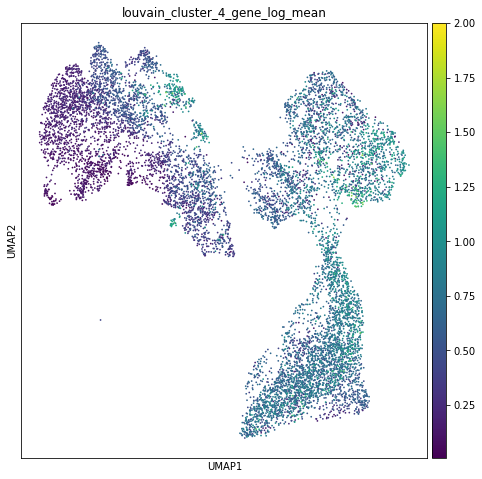

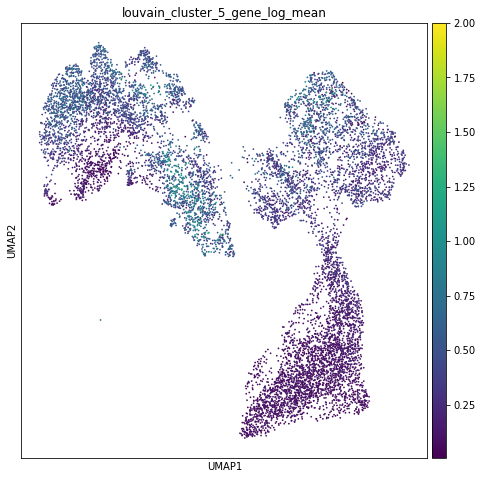

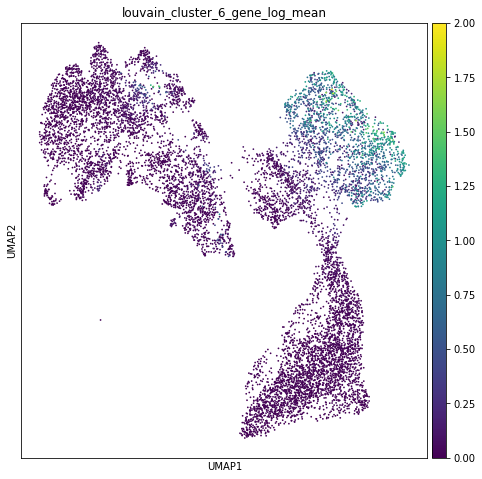

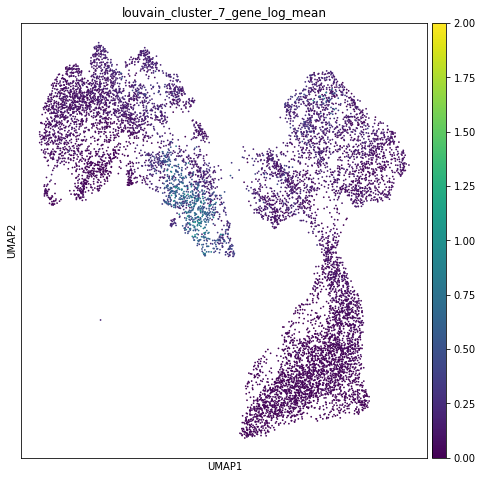

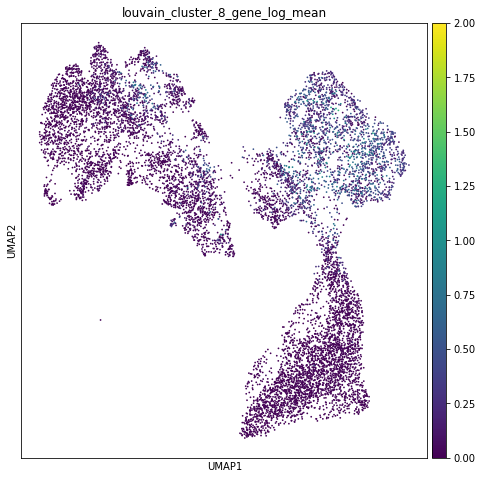

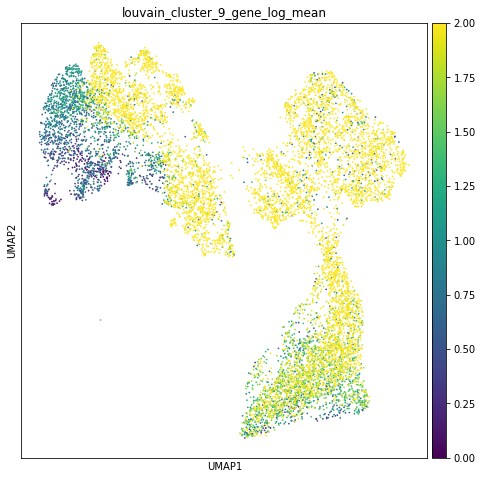

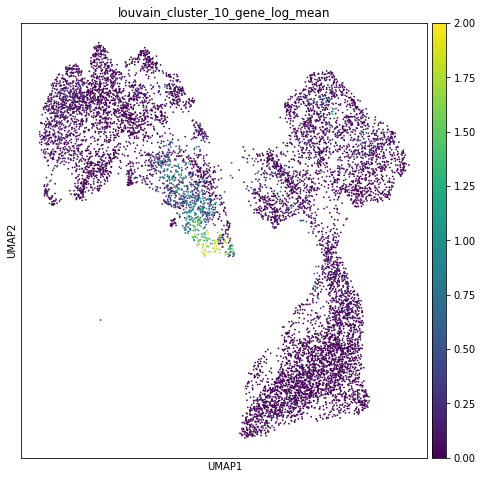

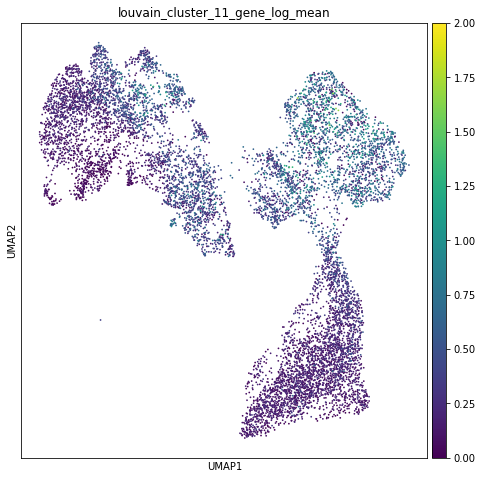

In [31]:
# Plot the scaled mean of each gene cluster on the original lenti-DLX2 neural cell map
for n_cluster_gene in range(len(louvain_clusters_counter)):
    n_cluster_gene = str(n_cluster_gene)
    sc.pl.umap(adata_neural_tmp, color='louvain_cluster_'+n_cluster_gene+'_gene_log_mean', vmax=2)

#### Visualize mean expr of each gene cluster along pseudotime

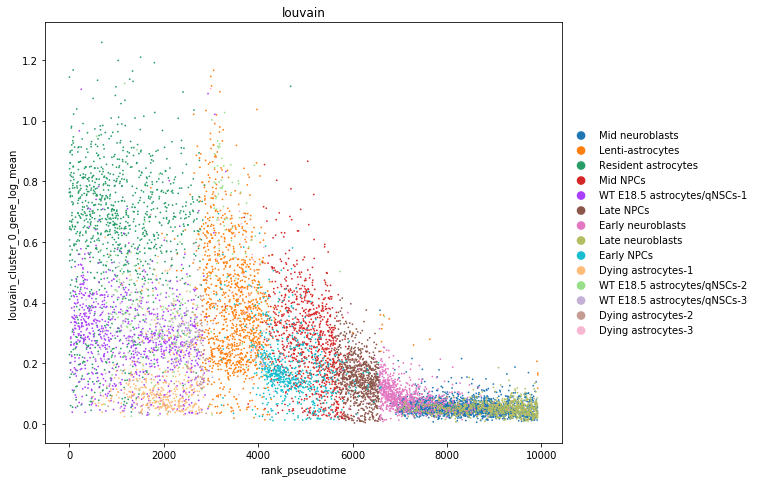

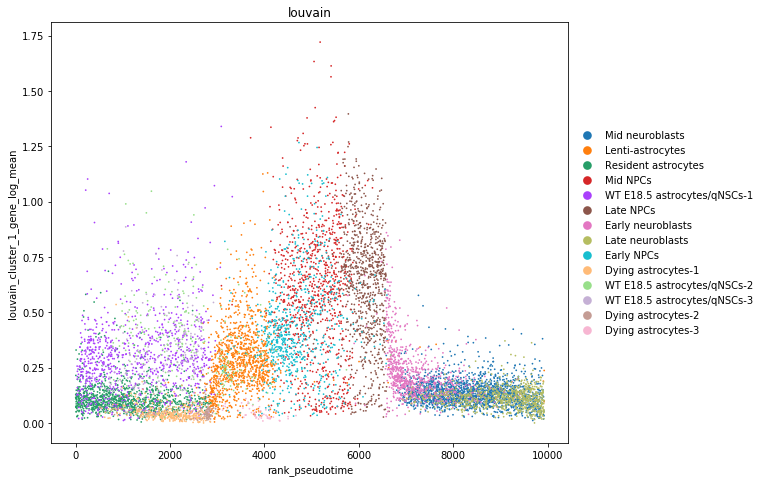

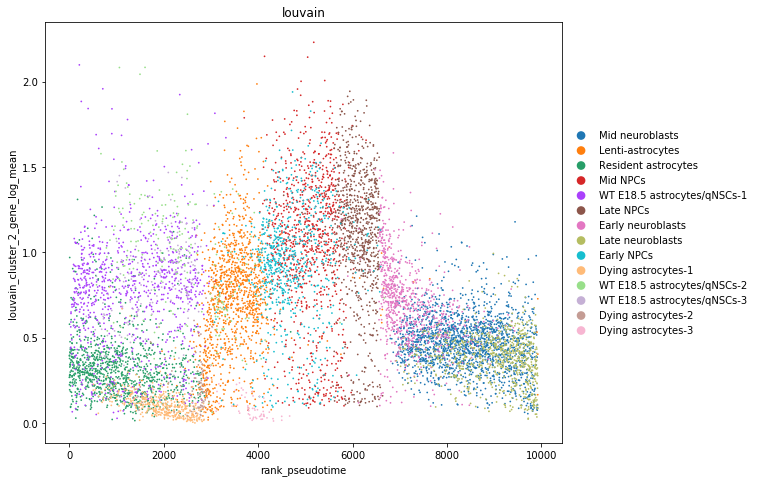

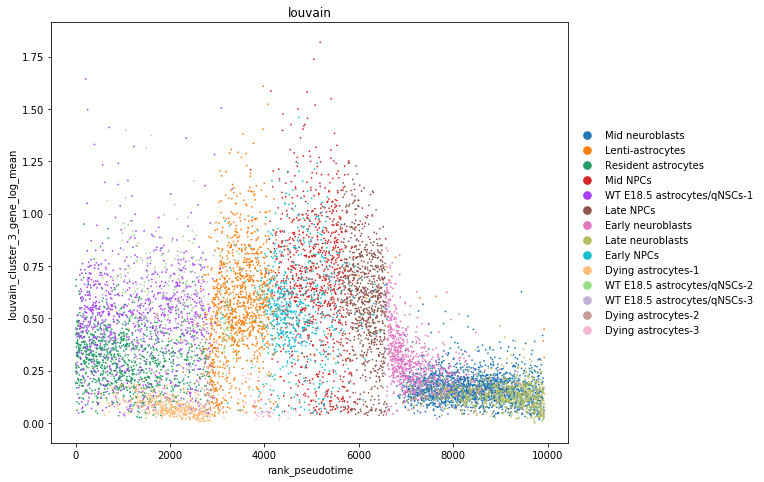

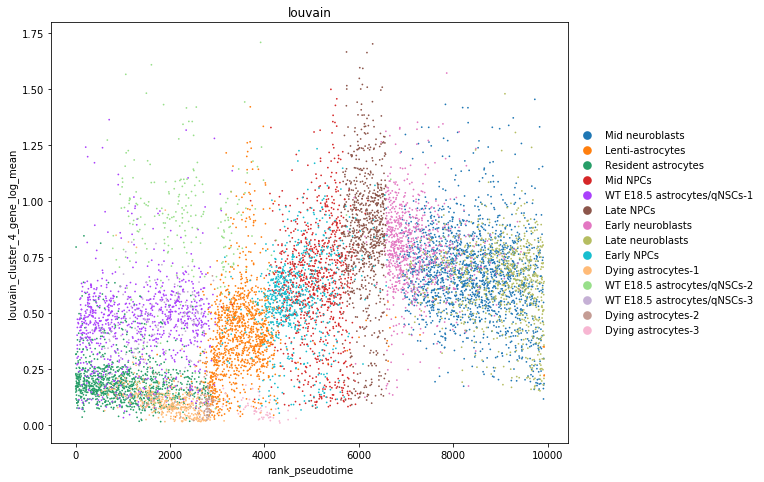

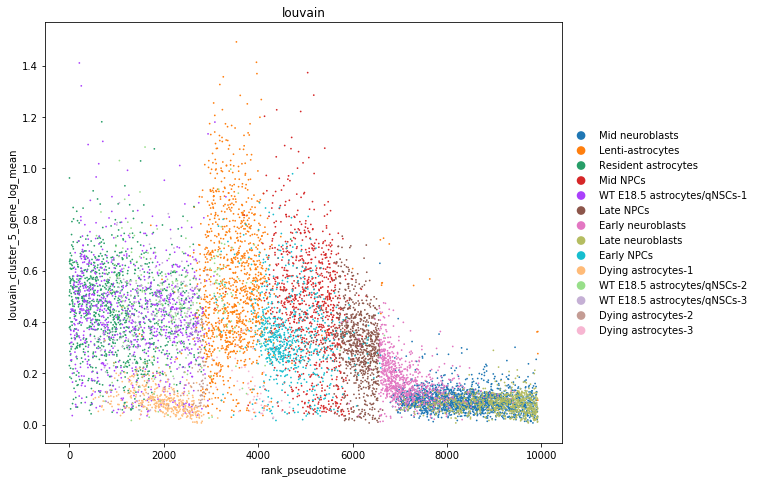

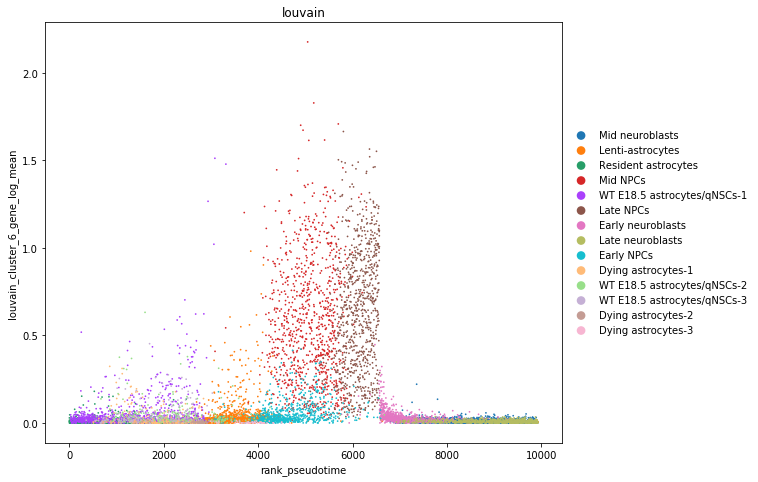

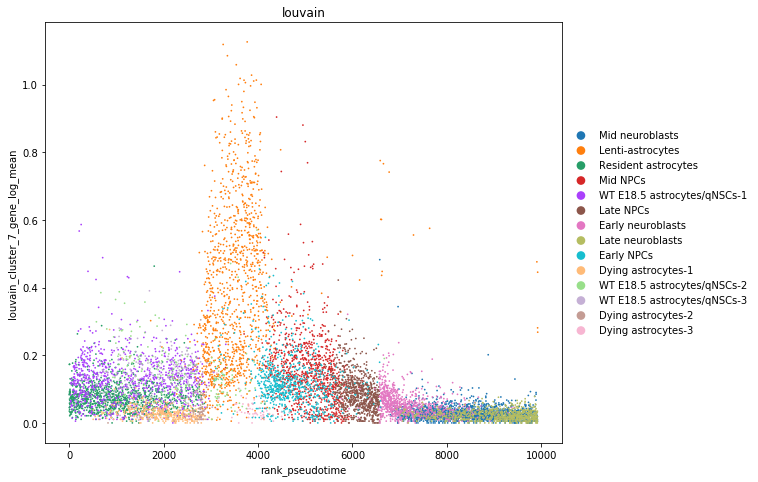

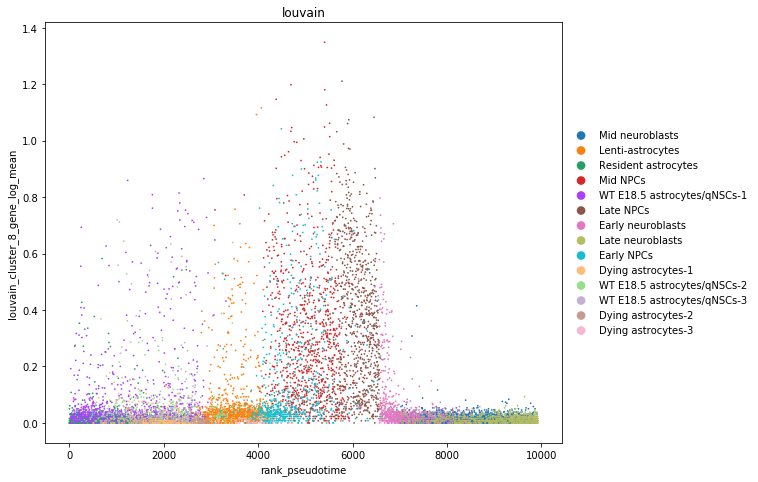

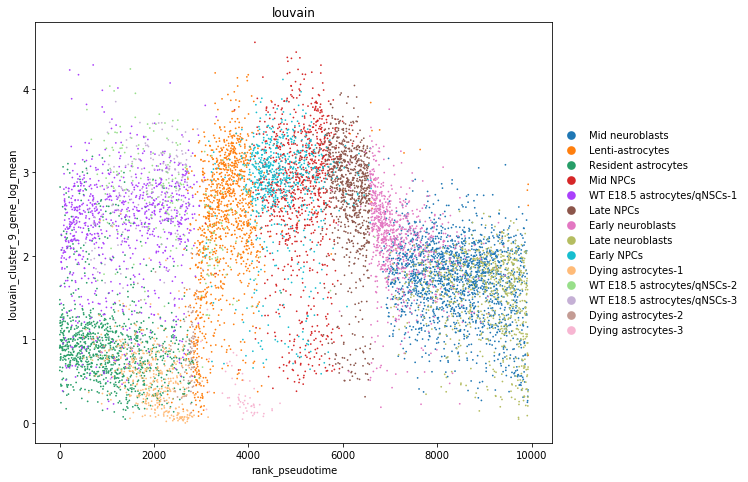

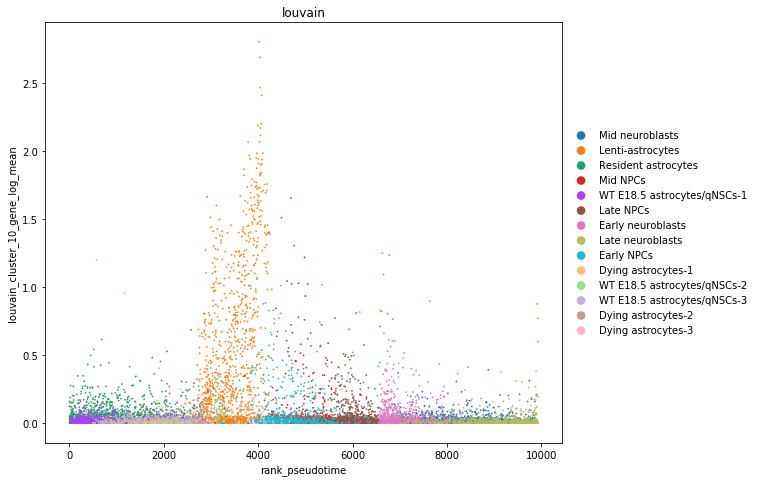

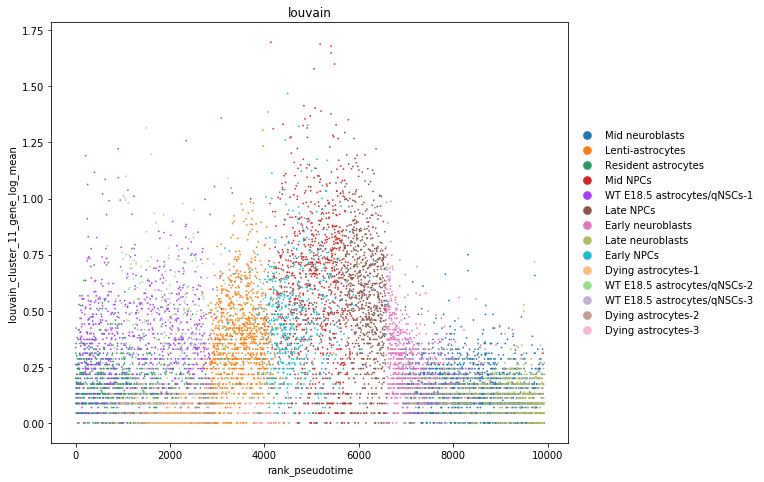

In [34]:
for n_cluster_gene in adata_genes.obs['louvain'].cat.categories:
#    n_cluster_gene = str(n_cluster_gene)
    sc.pl.scatter(adata_neural_tmp, x='rank_pseudotime', y='louvain_cluster_'+n_cluster_gene+'_gene_log_mean', color='louvain', 
             #save='_mainTraj_Egfr_alongPseudotime.pdf'
             )

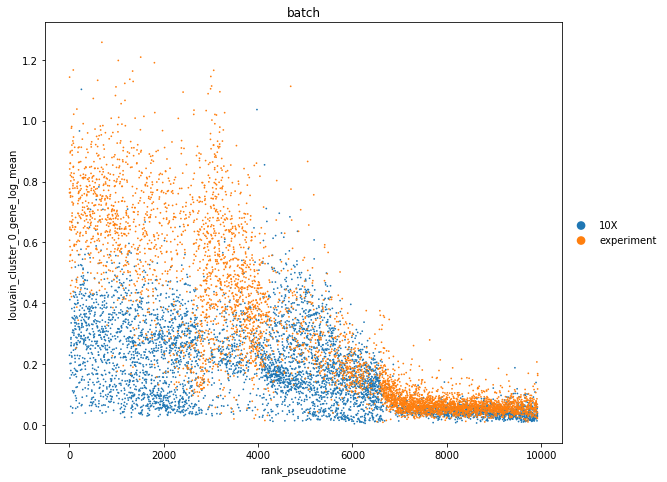

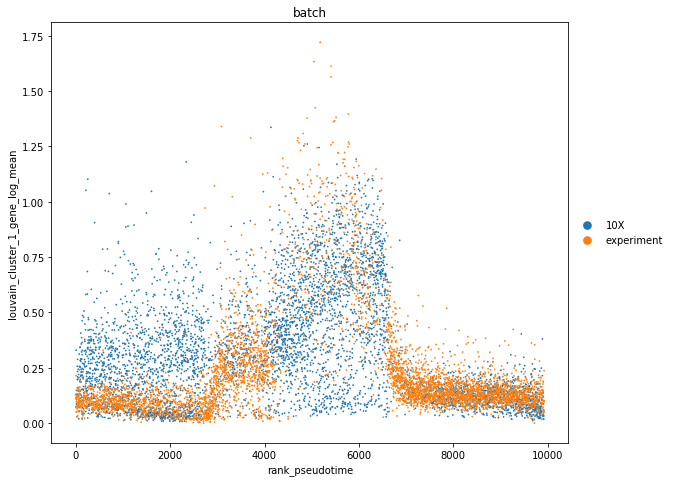

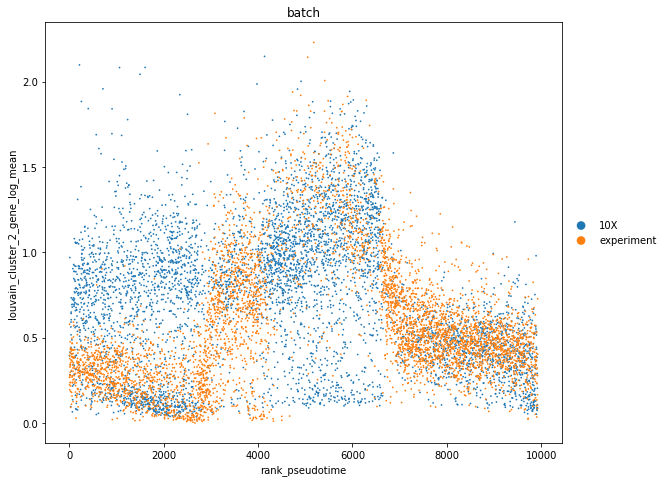

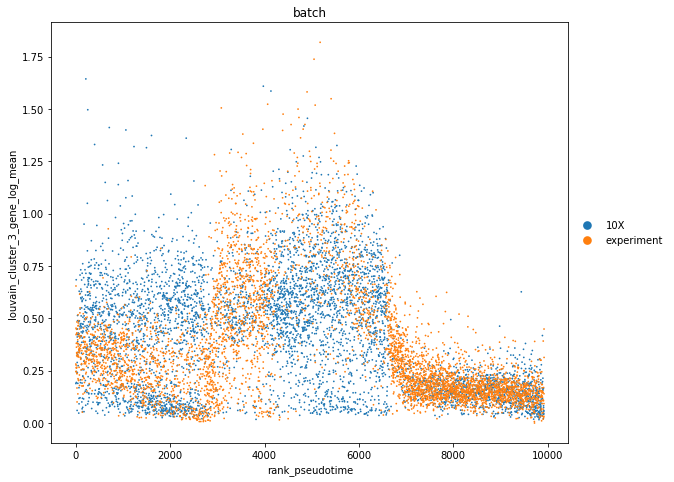

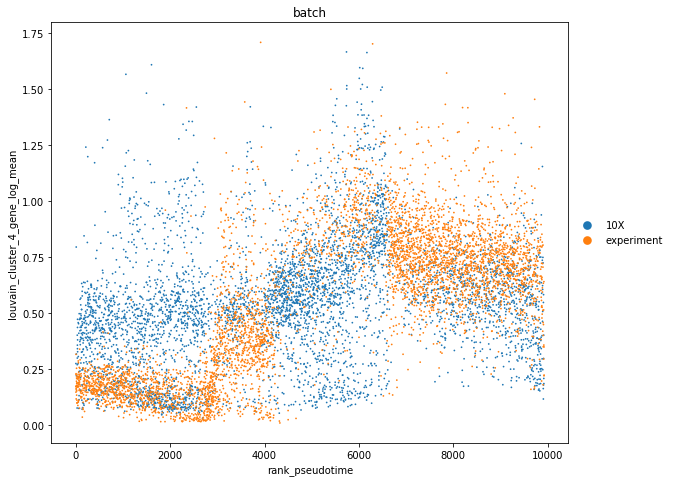

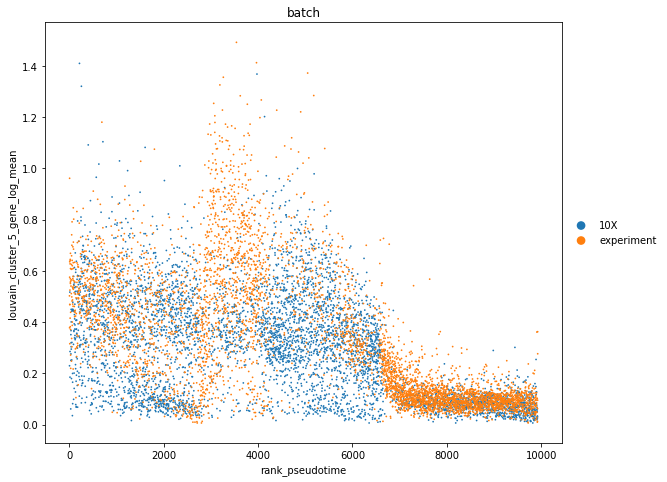

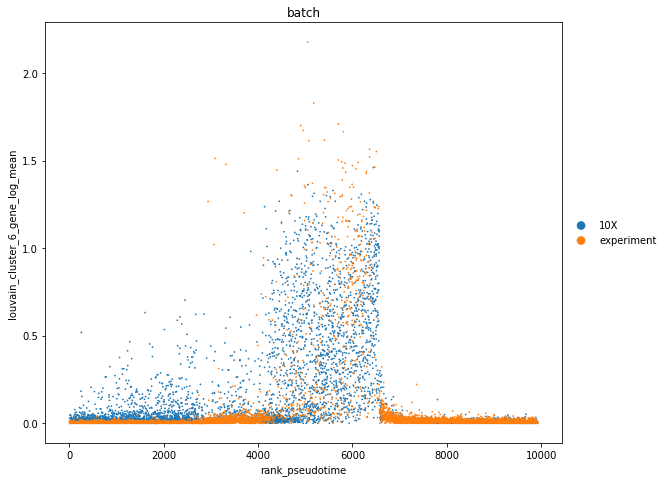

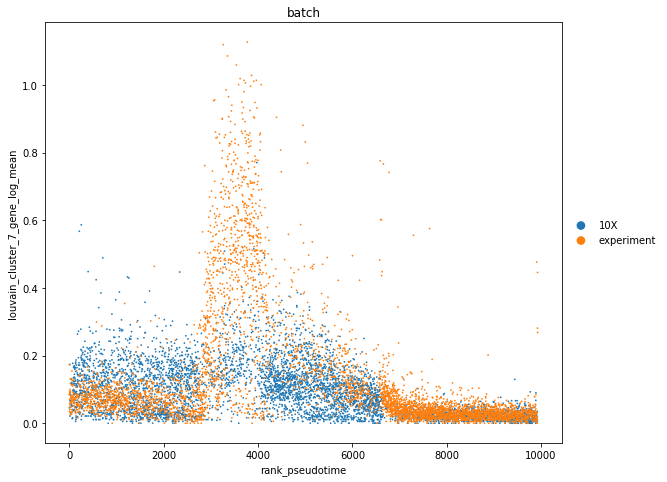

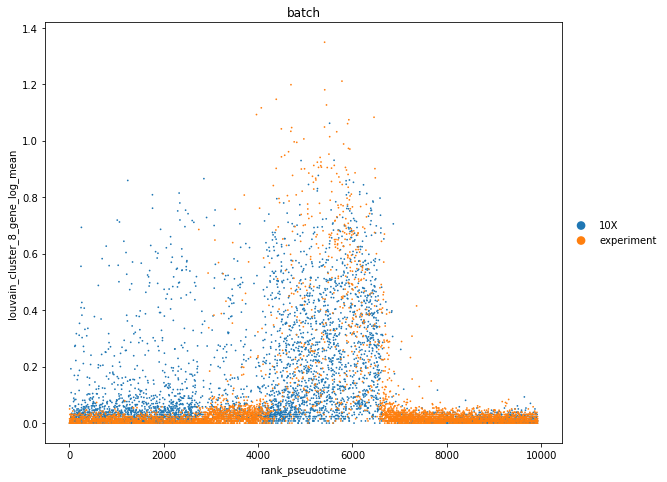

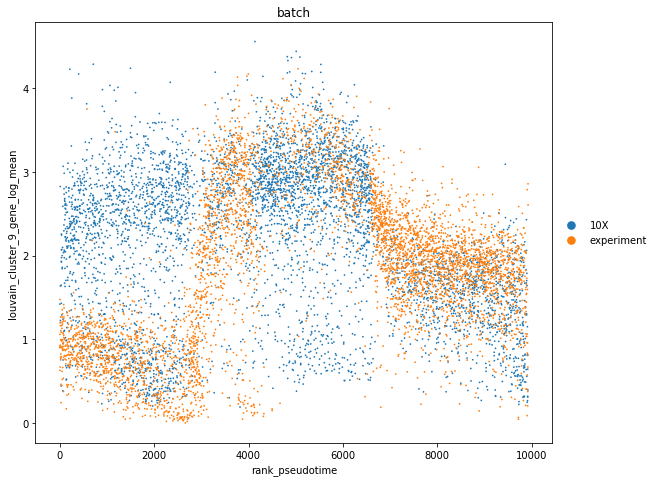

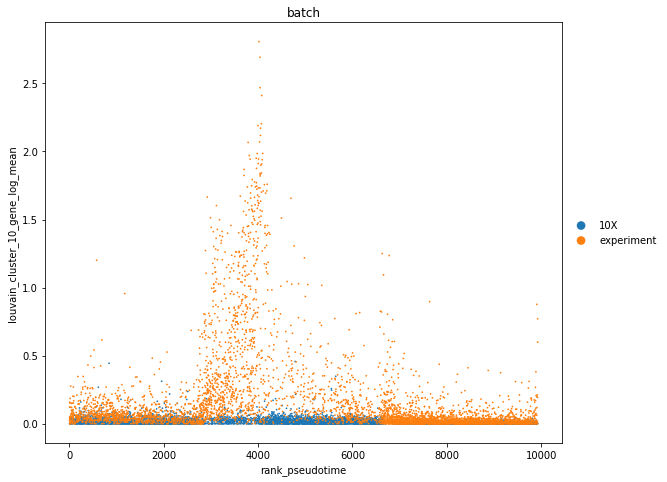

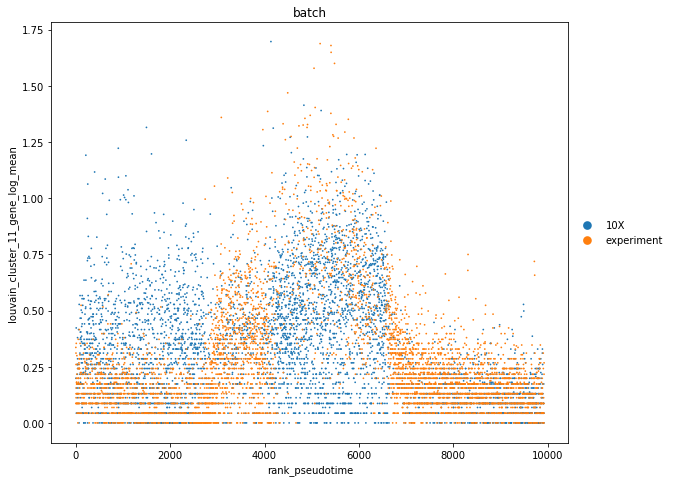

In [35]:
for n_cluster_gene in adata_genes.obs['louvain'].cat.categories:
#    n_cluster_gene = str(n_cluster_gene)
    sc.pl.scatter(adata_neural_tmp, x='rank_pseudotime', y='louvain_cluster_'+n_cluster_gene+'_gene_log_mean', color='batch', 
             #save='_mainTraj_Egfr_alongPseudotime.pdf'
             )

#### Calculate LOESS curves for each cluster

##### With scaled mean

In [120]:
gene_louvain_scaled_mean_loess = []
for n_cluster_gene in adata_genes.obs['louvain'].cat.categories:
#    n_cluster_gene = str(i)
    x = adata_neural_tmp.obs['rank_pseudotime']
    y = adata_neural_tmp.obs['louvain_cluster_'+n_cluster_gene+'_gene_scaled_mean']

    gene_louvain_scaled_mean_loess.append(lowess(y, x, frac=0.2)) 

In [13]:
python_dir = data_dir + 'Python_objects/'

In [122]:
output_path = python_dir + 'gene_louvain_scaled_mean_loess_Manuscript_v2'

with open(output_path, 'wb') as output_file:
 
    pickle.dump(gene_louvain_scaled_mean_loess, output_file)

In [14]:
input_path = python_dir + 'gene_louvain_scaled_mean_loess_Manuscript_v2'
with open(input_path, 'rb') as input_file:
 
    gene_louvain_scaled_mean_loess = pickle.load(input_file)

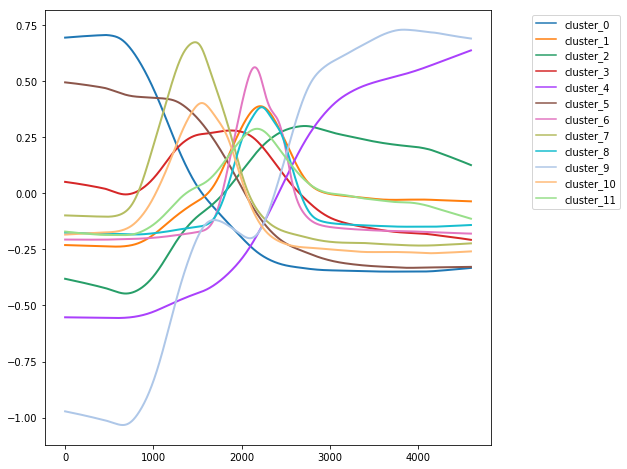

In [48]:
# Figure 4C
handles = []
for i in range(len(adata_genes.obs['louvain'].cat.categories)): 
#    print('Current cluster is: {}'.format(i))
    clr = adata_genes.uns['louvain_colors'][i]
    plt.plot(gene_louvain_scaled_mean_loess[i][:,0], gene_louvain_scaled_mean_loess[i][:,1], 
             clr,
             alpha=1, 
             linestyle='-', 
             linewidth=2
            )
    handles.append(mpl.lines.Line2D([], [], color=clr, linestyle='-', label='cluster_'+str(i)))

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1))
    
# plt.legend()
# plt.savefig('/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2/Figure2/linechart_loess_gene_clusters.pdf')
plt.show()    

#### Plot heatmap for gene cluster expression in cell clusters

In [50]:
adata_neural_tmp

AnnData object with n_obs × n_vars = 4601 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime', 'louvain_cluster_0_gene_log_mean', 'louvain_cluster_0_gene_scaled_mean', 'louvain_cluster_1_gene_log_mean', 'louvain_cluster_1_gene_scaled_mean', 'louvain_cluster_2_gene_log_mean', 'louvain_cluster_2_gene_scaled_mean', 'louvain_cluster_3_gene_log_mean', 'louvain_cluster_3_gene_scaled_mean', 'louvain_cluster_4_gene_log_mean', 'louvain_cluster_4_gene_scaled_mean', 'louvain_cluster_5_gene_log_mean', 'louvain_cluster_5_gene_scaled_mean', 'louvain_cluster_6_gene_log_mean', 'louvain_cluster_6_gene_scaled_mean', 'louvain_cluster_7_gene_log_mean', 'louvain_cluster_7_gene_scaled_mean', 'louvain_cluster_8_gene_log_mean', 'louvain_cluster_8_gene_scaled_mean', 'louvain_cluster_9_gene_log_mean', 'louvain_cluster_9_gene_scaled_m

In [51]:
gene_cluster_activity = pd.DataFrame(index=adata_genes.obs['louvain'].cat.categories)
for cluster in adata_neural_tmp.obs['louvain'].cat.categories:
#    cluster = 'Astrocytes-resident1'

    cell_index = adata_neural_tmp.obs.index[adata_neural_tmp.obs['louvain']==cluster]

    col_index = []
    for gene_cluster in gene_cluster_activity.index:
        col_index.append('louvain_cluster_'+gene_cluster+'_gene_scaled_mean')

    df_cluster = adata_neural_tmp.obs.loc[cell_index, col_index]

    gene_cluster_activity[cluster] = df_cluster.mean(axis=0).values

In [52]:
gene_cluster_activity.index = col_index

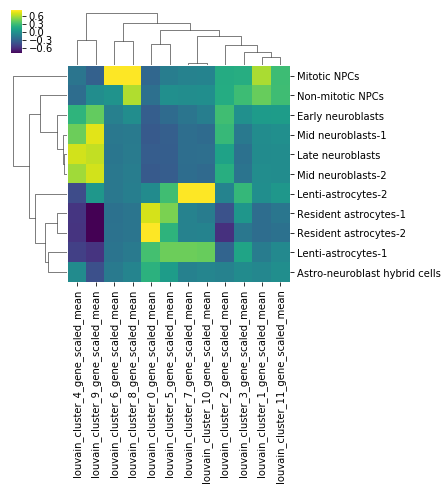

In [53]:
# Figure S4D
g = sns.clustermap(gene_cluster_activity.T, 
                    row_cluster=True, 
                    col_cluster=True, 
#                     row_colors=gene_color,
#                     col_colors=[cell_louvain_color,cell_rank_color],
                    cmap='viridis',
                    figsize=(5,5),
                    vmin=-0.8, 
                    vmax=0.8, 
#                     xticklabels=False, 
#                     yticklabels=yticklabels, 
                    rasterized=True )


#plt.savefig('/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2/Heatmap_gene_cluster_means_rasterized.pdf', 
#           dpi=600)

#### Print each cluster into csv

In [54]:
for cluster in adata_genes.obs['louvain'].cat.categories:
    gene_index = adata_genes.obs.index[adata_genes.obs['louvain']==cluster].tolist()
    df_cluster = pd.DataFrame(data={'genes': gene_index})
    df_cluster.to_csv('POv2_cluster'+cluster+'_genes.csv')

### 4.4 Plot heatmap for individual genes

In [19]:
adata_genes

AnnData object with n_obs × n_vars = 2469 × 4601 
    obs: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'p_val_adj', 'n_counts', 'n_cells_experimental', 'louvain', 'log10_n_cells_experimental'
    var: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime', 'Rpl32', 'Egfr'
    uns: 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

##### Calculate cell order (based on pseudotime)

In [20]:
cell_order = pd.DataFrame(adata_genes.var['rank_pseudotime'])

cell_order['order'] = range(cell_order.shape[0])

cell_order.sort_values(by='rank_pseudotime', axis=0, ascending=True, inplace=True)

##### Calculate gene order (based on cluster and expression timing)

In [21]:
python_dir = data_dir + 'Python_objects/'

In [22]:
input_path = python_dir + 'gene_louvain_scaled_mean_loess_Manuscript_v2'
with open(input_path, 'rb') as input_file:
 
    gene_louvain_scaled_mean_loess = pickle.load(input_file)

In [24]:
max_pos = []
for loess in gene_louvain_scaled_mean_loess:
    max_pos.append(loess[:,0][np.where(loess[:,1] == loess[:,1].max(), True, False)][0])

In [25]:
cluster_order = pd.DataFrame({'max_pos': max_pos})

cluster_order.sort_values(by='max_pos', axis=0, ascending=True, inplace=True)

In [26]:
gene_order = []
# for n_cluster in adata_genes.obs['louvain'].unique():
# for n_cluster in [str(i) for i in range(10)]:
for n_cluster in [str(i) for i in cluster_order.index]:
    for gene in adata_genes.obs.index[adata_genes.obs['louvain']==n_cluster]:
        gene_order.append(adata_genes.obs.index.get_loc(gene))

##### Make color vectors for genes (rows) and cells (columns) so that they match their corresponding Louvain colors

In [28]:
gene_color = []
for gene_louvain in adata_genes.obs.iloc[gene_order]['louvain']:
    gene_color.append(adata_genes.uns['louvain_colors'][int(gene_louvain)])

In [30]:
cell_louvain_color = []
for cell_louvain in adata_genes.var['louvain'][cell_order['order'].tolist()]:
    index = adata_neural_tmp.obs['louvain'].cat.categories.get_loc(cell_louvain)
    cell_louvain_color.append(adata_neural_tmp.uns['louvain_colors'][index])

In [32]:
cell_rank_color = sns.color_palette('YlOrBr', n_colors=adata_genes.var.shape[0])

In [33]:
genes_in_order = adata_genes[gene_order, :].obs.index.tolist()

In [34]:
genes_to_label = ['Aldh1l1', 'Clu', 'Id3', 'Rpl32', 'Ascl1', 'Cdk1', 'Mki67', 'Ccna2', 'Dlx1', 'Dlx2', 'Dcx', 'Dlx6os1', 'Calb2']

In [35]:
yticklabels = []
for gene in genes_in_order:
    if gene in genes_to_label:
        yticklabels.append(gene)
    else:
        yticklabels.append('')

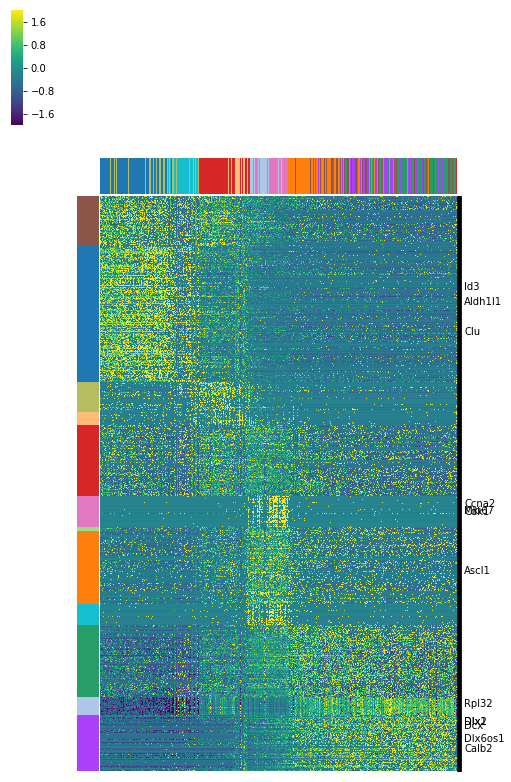

In [36]:
# Figure 4D
g = sns.clustermap(adata_genes.X[gene_order, :][:, cell_order['order'].tolist()], 
                    row_cluster=False, 
                    col_cluster=False, 
                    row_colors=gene_color,
#                    col_colors=[cell_louvain_color,cell_rank_color],
                    col_colors=cell_louvain_color,
                    cmap='viridis',
                    figsize=(8,14),
                    vmin=-2, 
                    vmax=2, 
                    xticklabels=False, 
                    yticklabels=yticklabels, 
                    rasterized=True)

# plt.savefig('/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2/Figure2/Heatmap_gene_clusters_rasterized.pdf',
# dpi=400)

## Miscellaneous: plotting genes and gene sets

### 3.3 Comfirm the expression patterns of known marker genes

In [12]:
adata_experiment_neural =sc.read(neural_data_dir + 'POv2_BL41Only_NeuronalOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')